In [ ]:
!pip install textblob nltk vaderSentiment
#nltk.download('movie_reviews')
nltk.download('punkt')

In [2]:
import pandas as pd
import torch
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
import numpy as np

device = 0 if torch.cuda.is_available() else -1
device

-1

In [2]:
filepath = r"combined_df.csv"
df = pd.read_csv(filepath, dtype=str).sort_values(by='Survey ID')
#df
df['Combined Text'] = df['Combined Text'].astype(str)

In [11]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def textblob_naive_bayes_sentiment(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment.classification

def nltk_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    return vs['compound']

In [13]:
sampled_df = df.sample(n=1000, random_state=42)
#sampled_df=pd.read_csv('sentiment_analysis_output[WD].csv')
#sampled_df['Combined Text'] = sampled_df['Combined Text'].astype(str)

In [14]:
sampled_df['TextBlob_Sentiment'] = sampled_df['Combined Text'].apply(textblob_sentiment)
sampled_df

,Survey ID,Product Name,Print Customer Region,LTR,Source Type,Survey language,Review Source,Star Rating,Product Family,Supplies Family,...,Model Name,Combined Text,Ink Supply Type,token_count,Response Date,Month of Response Date,predicted_level1,NLTK_Vader_Sentiment,TextBlob_NaiveBayes_Sentiment,TextBlob_Sentiment
0,332504286,HP DeskJet Ink Advantage 2774 All-in-One Printer,BR,8,HPS Surveys,Portuguese (Brazil),NaN,NaN,Supplies - Ink,Obelisk,...,HP DeskJet Ink Advantage 2779 All-in-One Printer,Because I have some difficulties to use it and...,IPH,27,2023-08-22 04:35:21,2023-08-01 00:00:00,Customer experience & expectation,-0.6124,pos,-0.193750
1,335441755,HP 951XL High Yield Yellow Original Ink Cartridge,US,10,Web Reviews,English,Office Depot,5.0,Supplies - Ink,Nesta+,...,HP 951XL High Yield Yellow Original Ink Cartridge,Bought a few weeks ago. Easy to install. Excel...,IIC,10,2023-08-23 17:24:50,2023-08-01 00:00:00,General satisfied,0.7650,pos,0.411111
2,355168008,HP 952XL High Yield Black Original Ink Cartridge,US,10,Web Reviews,English,Office Depot,5.0,Supplies - Ink,Supernesta,...,HP 952XL High Yield Black Original Ink Cartridge,Only recommend original HP ink! Best ink!,IIC,7,2023-12-19 13:07:20,2023-12-01 00:00:00,Others,0.8619,pos,0.489583
3,347332806,HP ENVY 6055e All-in-One Printer,US,1,HPS Surveys,English,NaN,NaN,Supplies - Ink,Obelisk,...,HP ENVY 6055e All-in-One Printer,IT was fine until it wasn't. The copies were g...,IPH,44,2023-11-14 19:04:26,2023-11-01 00:00:00,Cartridge Problem,-0.9050,neg,-0.131667
4,342918354,HP ENVY Photo 7155 All-in-One Printer,US,1,HPS Surveys,English,NaN,NaN,Supplies - Ink,Centaur,...,HP ENVY Photo 7155 All-in-One Printer,The HP Ink service has charged me on 2 differe...,IPH,72,2023-10-20 22:16:18,2023-10-01 00:00:00,Customer experience & expectation,-0.5859,neg,-0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,381756644,HP 62 Black Original Ink Cartridge,US,10,Web Reviews,English,Amazon US,5.0,Supplies - Ink,Minotaur,...,HP 62 Black Original Ink Cartridge,Never any issues with HP Inkjets. No leaking o...,IPH,18,2024-04-11 01:00:00,2024-04-01 00:00:00,Others,-0.2023,neg,0.400000
996,368105146,HP ENVY Inspire 7255e All-in-One Printer,US,10,HPS Surveys,English,NaN,NaN,Supplies - Ink,Centaur,...,HP ENVY Inspire 7255e All-in-One Printer,Easy to use. Good color. I like the ink cartri...,IPH,11,2024-03-23 12:30:51,2024-03-01 00:00:00,General satisfied,0.8074,pos,0.566667
997,345836499,HP DeskJet 3755 All-in-One Printer,US,8,HPS Surveys,English,NaN,NaN,Supplies - Ink,Dolmen Refresh,...,HP DeskJet 3755 All-in-One Printer,Very good basic printer and works well for me....,IPH,26,2023-11-04 09:24:02,2023-11-01 00:00:00,"General satisfied, Print quality",0.8070,pos,0.352500
998,370556058,HP OfficeJet Pro 8022e All-in-One Printer,DE,0,HPS Surveys,German,NaN,NaN,Supplies - Ink,Cedella,...,HP OfficeJet Pro 8022e All-in-One Printer,Printer cartridges are far too expensive,IIC,6,2024-03-18 13:04:58,2024-03-01 00:00:00,Cost,0.0000,pos,-0.200000


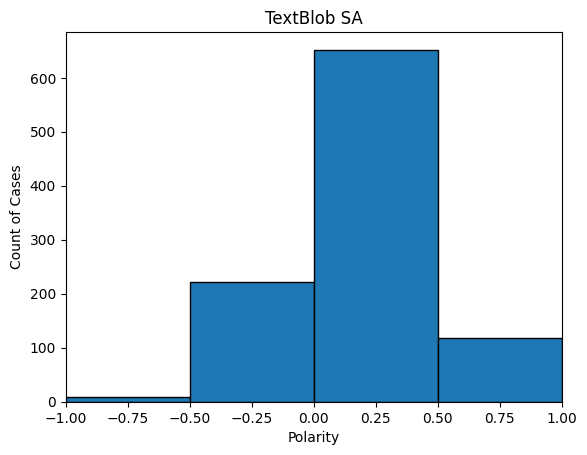

In [24]:
import matplotlib.pyplot as plt

# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['TextBlob_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('TextBlob SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

In [8]:
sampled_df['TextBlob_NaiveBayes_Sentiment'] = sampled_df['Combined Text'].apply(textblob_naive_bayes_sentiment)
sampled_df

#25mins for 1000 rows

,Survey ID,Product Name,Print Customer Region,LTR,Source Type,Survey language,Review Source,Star Rating,Product Family,Supplies Family,Printer Family,Model Name,Combined Text,Ink Supply Type,token_count,Response Date,Month of Response Date,predicted_level1,NLTK_Vader_Sentiment,TextBlob_NaiveBayes_Sentiment
25588,332504286,HP DeskJet Ink Advantage 2774 All-in-One Printer,BR,8,HPS Surveys,Portuguese (Brazil),NaN,NaN,Supplies - Ink,Obelisk,Taccola,HP DeskJet Ink Advantage 2779 All-in-One Printer,Because I have some difficulties to use it and...,IPH,27,2023-08-22 04:35:21,2023-08-01 00:00:00,Customer experience & expectation,-0.6124,pos
30810,335441755,HP 951XL High Yield Yellow Original Ink Cartridge,US,10,Web Reviews,English,Office Depot,5,Supplies - Ink,Nesta+,NaN,HP 951XL High Yield Yellow Original Ink Cartridge,Bought a few weeks ago. Easy to install. Excel...,IIC,10,2023-08-23 17:24:50,2023-08-01 00:00:00,General satisfied,0.7650,pos
61411,355168008,HP 952XL High Yield Black Original Ink Cartridge,US,10,Web Reviews,English,Office Depot,5,Supplies - Ink,Supernesta,NaN,HP 952XL High Yield Black Original Ink Cartridge,Only recommend original HP ink! Best ink!,IIC,7,2023-12-19 13:07:20,2023-12-01 00:00:00,Others,0.8619,pos
49186,347332806,HP ENVY 6055e All-in-One Printer,US,1,HPS Surveys,English,NaN,NaN,Supplies - Ink,Obelisk,Vasari Yeti,HP ENVY 6055e All-in-One Printer,IT was fine until it wasn't. The copies were g...,IPH,44,2023-11-14 19:04:26,2023-11-01 00:00:00,Cartridge Problem,-0.9050,neg
42104,342918354,HP ENVY Photo 7155 All-in-One Printer,US,1,HPS Surveys,English,NaN,NaN,Supplies - Ink,Centaur,Palermo,HP ENVY Photo 7155 All-in-One Printer,The HP Ink service has charged me on 2 differe...,IPH,72,2023-10-20 22:16:18,2023-10-01 00:00:00,Customer experience & expectation,-0.5859,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93038,381756644,HP 62 Black Original Ink Cartridge,US,10,Web Reviews,English,Amazon US,5,Supplies - Ink,Minotaur,NaN,HP 62 Black Original Ink Cartridge,Never any issues with HP Inkjets. No leaking o...,IPH,18,2024-04-11 01:00:00,2024-04-01 00:00:00,Others,-0.2023,neg
78001,368105146,HP ENVY Inspire 7255e All-in-One Printer,US,10,HPS Surveys,English,NaN,NaN,Supplies - Ink,Centaur,Novelli Yeti,HP ENVY Inspire 7255e All-in-One Printer,Easy to use. Good color. I like the ink cartri...,IPH,11,2024-03-23 12:30:51,2024-03-01 00:00:00,General satisfied,0.8074,pos
46188,345836499,HP DeskJet 3755 All-in-One Printer,US,8,HPS Surveys,English,NaN,NaN,Supplies - Ink,Dolmen Refresh,Lhasa,HP DeskJet 3755 All-in-One Printer,Very good basic printer and works well for me....,IPH,26,2023-11-04 09:24:02,2023-11-01 00:00:00,"General satisfied, Print quality",0.8070,pos
83085,370556058,HP OfficeJet Pro 8022e All-in-One Printer,DE,0,HPS Surveys,German,NaN,NaN,Supplies - Ink,Cedella,Malbec Yeti,HP OfficeJet Pro 8022e All-in-One Printer,Printer cartridges are far too expensive,IIC,6,2024-03-18 13:04:58,2024-03-01 00:00:00,Cost,0.0000,pos


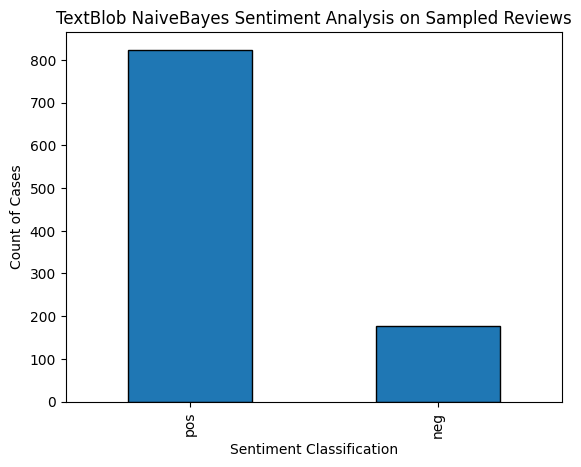

In [11]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment classification
sentiment_counts = sampled_df['TextBlob_NaiveBayes_Sentiment'].value_counts()

# Plot the bar chart
sentiment_counts.plot(kind='bar', edgecolor='black')

# Set the labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Count of Cases')
plt.title('TextBlob NaiveBayes Sentiment Analysis on Sampled Reviews')

# Show the plot
plt.show()

In [9]:
sampled_df['NLTK_Vader_Sentiment'] = sampled_df['Combined Text'].apply(nltk_vader_sentiment)
sampled_df

,Survey ID,Product Name,Print Customer Region,LTR,Source Type,Survey language,Review Source,Star Rating,Product Family,Supplies Family,Printer Family,Model Name,Combined Text,Ink Supply Type,token_count,Response Date,Month of Response Date,predicted_level1,NLTK_Vader_Sentiment,TextBlob_NaiveBayes_Sentiment
25588,332504286,HP DeskJet Ink Advantage 2774 All-in-One Printer,BR,8,HPS Surveys,Portuguese (Brazil),NaN,NaN,Supplies - Ink,Obelisk,Taccola,HP DeskJet Ink Advantage 2779 All-in-One Printer,Because I have some difficulties to use it and...,IPH,27,2023-08-22 04:35:21,2023-08-01 00:00:00,Customer experience & expectation,-0.6124,pos
30810,335441755,HP 951XL High Yield Yellow Original Ink Cartridge,US,10,Web Reviews,English,Office Depot,5,Supplies - Ink,Nesta+,NaN,HP 951XL High Yield Yellow Original Ink Cartridge,Bought a few weeks ago. Easy to install. Excel...,IIC,10,2023-08-23 17:24:50,2023-08-01 00:00:00,General satisfied,0.7650,pos
61411,355168008,HP 952XL High Yield Black Original Ink Cartridge,US,10,Web Reviews,English,Office Depot,5,Supplies - Ink,Supernesta,NaN,HP 952XL High Yield Black Original Ink Cartridge,Only recommend original HP ink! Best ink!,IIC,7,2023-12-19 13:07:20,2023-12-01 00:00:00,Others,0.8619,pos
49186,347332806,HP ENVY 6055e All-in-One Printer,US,1,HPS Surveys,English,NaN,NaN,Supplies - Ink,Obelisk,Vasari Yeti,HP ENVY 6055e All-in-One Printer,IT was fine until it wasn't. The copies were g...,IPH,44,2023-11-14 19:04:26,2023-11-01 00:00:00,Cartridge Problem,-0.9050,neg
42104,342918354,HP ENVY Photo 7155 All-in-One Printer,US,1,HPS Surveys,English,NaN,NaN,Supplies - Ink,Centaur,Palermo,HP ENVY Photo 7155 All-in-One Printer,The HP Ink service has charged me on 2 differe...,IPH,72,2023-10-20 22:16:18,2023-10-01 00:00:00,Customer experience & expectation,-0.5859,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93038,381756644,HP 62 Black Original Ink Cartridge,US,10,Web Reviews,English,Amazon US,5,Supplies - Ink,Minotaur,NaN,HP 62 Black Original Ink Cartridge,Never any issues with HP Inkjets. No leaking o...,IPH,18,2024-04-11 01:00:00,2024-04-01 00:00:00,Others,-0.2023,neg
78001,368105146,HP ENVY Inspire 7255e All-in-One Printer,US,10,HPS Surveys,English,NaN,NaN,Supplies - Ink,Centaur,Novelli Yeti,HP ENVY Inspire 7255e All-in-One Printer,Easy to use. Good color. I like the ink cartri...,IPH,11,2024-03-23 12:30:51,2024-03-01 00:00:00,General satisfied,0.8074,pos
46188,345836499,HP DeskJet 3755 All-in-One Printer,US,8,HPS Surveys,English,NaN,NaN,Supplies - Ink,Dolmen Refresh,Lhasa,HP DeskJet 3755 All-in-One Printer,Very good basic printer and works well for me....,IPH,26,2023-11-04 09:24:02,2023-11-01 00:00:00,"General satisfied, Print quality",0.8070,pos
83085,370556058,HP OfficeJet Pro 8022e All-in-One Printer,DE,0,HPS Surveys,German,NaN,NaN,Supplies - Ink,Cedella,Malbec Yeti,HP OfficeJet Pro 8022e All-in-One Printer,Printer cartridges are far too expensive,IIC,6,2024-03-18 13:04:58,2024-03-01 00:00:00,Cost,0.0000,pos


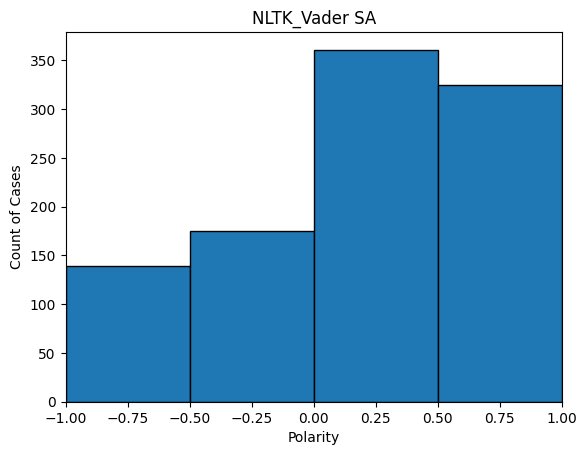

In [7]:
import matplotlib.pyplot as plt

# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['NLTK_Vader_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('NLTK_Vader SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

In [15]:
sampled_df.to_csv('sentiment_analysis_output[WD].csv', index=False)

In [18]:
###########get df after sentiment analysis
df_sa=pd.read_csv('sentiment_analysis_output[WD].csv')
df_sa['Sentiment_Label'] = df_sa['TextBlob_Sentiment'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')


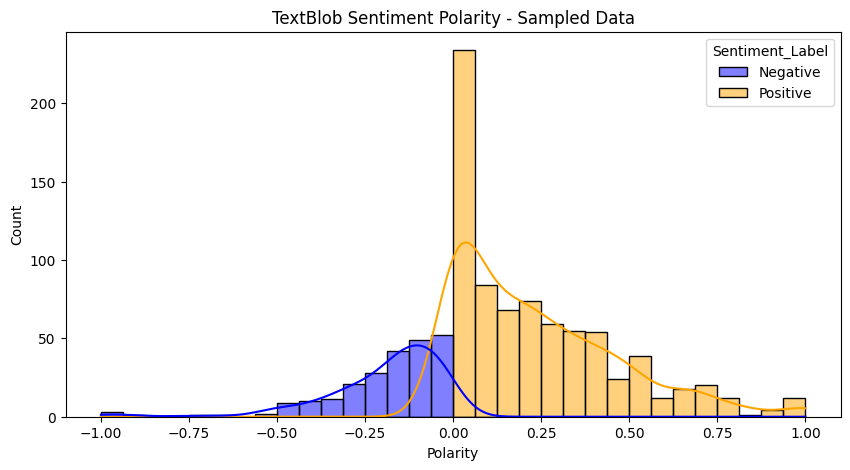

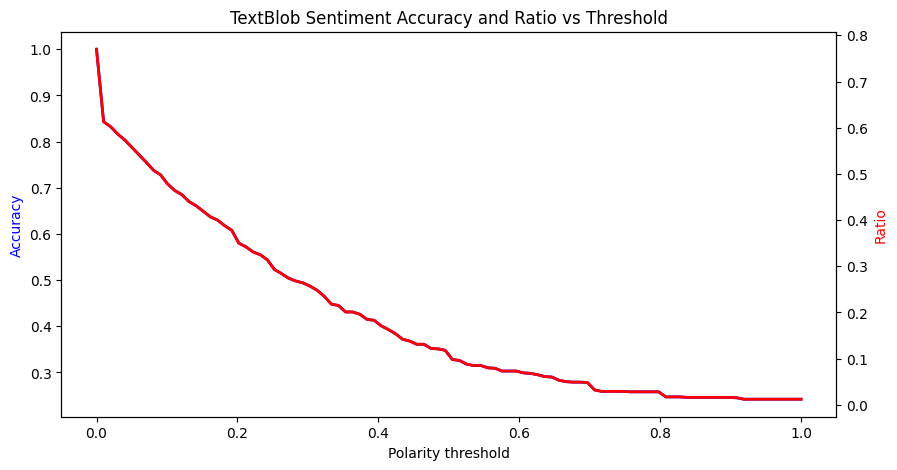

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(10, 5))

# Histogram of sentiment polarity
sns.histplot(data=df_sa, x='TextBlob_Sentiment', hue='Sentiment_Label', kde=True, palette={"Positive": "orange", "Negative": "blue"})

plt.title("TextBlob Sentiment Polarity - Sampled Data")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()


# Generate accuracy and ratio based on thresholds
thresholds = np.linspace(0, 1, 100)
accuracy = []
neg_pos_ratio = []

for threshold in thresholds:
    predicted_pos = df_sa['TextBlob_Sentiment'] >= threshold
    actual_pos = df_sa['Sentiment_Label'] == 'Positive'
    
    acc = (predicted_pos == actual_pos).mean()
    ratio = predicted_pos.mean()
    
    accuracy.append(acc)
    neg_pos_ratio.append(ratio)

# Plot the accuracy and ratio
fig, ax1 = plt.subplots(figsize=(10, 5))

# Accuracy plot
ax1.plot(thresholds, accuracy, 'b-', label='Accuracy (neg/pos)', linewidth=2)
ax1.set_xlabel('Polarity threshold')
ax1.set_ylabel('Accuracy', color='b')

# Share x-axis for ratio
ax2 = ax1.twinx()
ax2.plot(thresholds, neg_pos_ratio, 'r-', label='Ratio (neg/pos vs all)', linewidth=2)
ax2.set_ylabel('Ratio', color='r')

plt.title('TextBlob Sentiment Accuracy and Ratio vs Threshold')
plt.show()
